# Cardiovascular Disease | EDA, UML, SML

# Variables
- ID: Unique identifier for each patient.
- age: Age of the patient in days.
- age_years: Age of the patient in years (derived from age).
- gender: Gender of the patient. Categorical variable (1: Female, 2: Male).
- height: Height of the patient in centimeters.
- weight: Weight of the patient in kilograms.
- ap_hi: Systolic blood pressure.
- ap_lo: Diastolic blood pressure.
- cholesterol: Cholesterol levels. Categorical variable (1: Normal, 2: Above Normal, 3: Well Above Normal).
- gluc: Glucose levels. Categorical variable (1: Normal, 2: Above Normal, 3: Well Above Normal).
- smoke: Smoking status. Binary variable (0: Non-smoker, 1: Smoker).
- alco: Alcohol intake. Binary variable (0: Does not consume alcohol, 1: Consumes alcohol).
- active: Physical activity. Binary variable (0: Not physically active, 1: Physically active).
- cardio: Presence or absence of cardiovascular disease. Target variable. Binary (0: Absence, 1: Presence).
- bmi: Body Mass Index, derived from weight and height. Calculated as ( \text{BMI} = \frac{\text{weight (kg)}}{\text{height (m)}^2} ).
- bp_category: Blood pressure category based on ap_hi and ap_lo. Categories include "Normal", "Elevated", "Hypertension Stage 1", "Hypertension Stage 2", and "Hypertensive Crisis".
- bp_category_encoded: Encoded form of bp_category for machine learning purposes.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
palette = sns.color_palette()

In [264]:
import pandas as pd
df = pd.read_csv('cardio_data_processed.csv')


In [829]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded,gender_name,cholesterol_cat,glucose_cat
0,14628,17423,1,168,90.0,140,80,1,1,0,0,1,1,47,31.887755,Hypertension Stage 1,2,Female,Normal,Normal
1,55327,15846,1,163,85.0,120,80,1,1,0,0,1,0,43,31.992171,Hypertension Stage 1,2,Female,Normal,Normal
2,54683,18022,1,160,56.0,110,70,1,1,0,0,0,0,49,21.875000,Normal,0,Female,Normal,Normal
3,84258,19488,1,165,88.0,140,90,2,1,0,0,0,0,53,32.323232,Hypertension Stage 2,3,Female,Above Normal,Normal
4,80506,19890,1,165,73.0,120,80,1,1,0,0,1,0,54,26.813590,Hypertension Stage 1,2,Female,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47444,4527,16836,2,195,117.0,130,80,3,3,0,0,1,1,46,30.769231,Hypertension Stage 1,2,Male,Well Above Normal,Well Above Normal
47445,20309,19119,2,171,75.0,140,90,1,1,0,0,0,1,52,25.648918,Hypertension Stage 2,3,Male,Normal,Normal
47446,39385,17581,2,165,70.0,120,80,1,1,0,0,1,0,48,25.711662,Hypertension Stage 1,2,Male,Normal,Normal
47447,54394,20405,2,169,72.0,130,90,1,1,0,0,1,1,55,25.209201,Hypertension Stage 1,2,Male,Normal,Normal


In [530]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47449 entries, 0 to 47448
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   47449 non-null  int64  
 1   age                  47449 non-null  int64  
 2   gender               47449 non-null  int64  
 3   height               47449 non-null  int64  
 4   weight               47449 non-null  float64
 5   ap_hi                47449 non-null  int64  
 6   ap_lo                47449 non-null  int64  
 7   cholesterol          47449 non-null  int64  
 8   gluc                 47449 non-null  int64  
 9   smoke                47449 non-null  int64  
 10  alco                 47449 non-null  int64  
 11  active               47449 non-null  int64  
 12  cardio               47449 non-null  int64  
 13  age_years            47449 non-null  int64  
 14  bmi                  47449 non-null  float64
 15  bp_category          47449 non-null 

In [ ]:
cols = ['bmi', 'cholesterol', 'bp_category_encoded', 'cardio']

In [253]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category_encoded,clusters
count,68059.000000,68059.000000,68059.000000,68059.000000,68059.000000,68059.000000,68059.000000,68059.000000,68059.000000,68059.000000,68059.000000,68059.000000,68059.000000,68059.000000,68059.000000,68059.000000,68059.000000
mean,49972.814102,19462.975007,1.348712,164.476425,74.098662,126.438693,81.267180,1.363508,1.225231,0.087718,0.053174,0.803656,0.493763,52.824476,27.422884,1.912400,2.611484
std,28853.247673,2467.826549,0.476566,7.801842,14.246314,15.958942,9.141929,0.678299,0.571344,0.282886,0.224383,0.397235,0.499965,6.768419,5.176499,0.907355,1.858662
min,0.000000,10798.000000,1.000000,140.000000,11.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,3.471784,0.000000,0.000000
25%,24996.500000,17656.500000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115,2.000000,1.000000
50%,50012.000000,19700.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000,26.298488,2.000000,2.000000
75%,74877.500000,21323.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.116002,2.000000,5.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000,68.308315,3.000000,5.000000


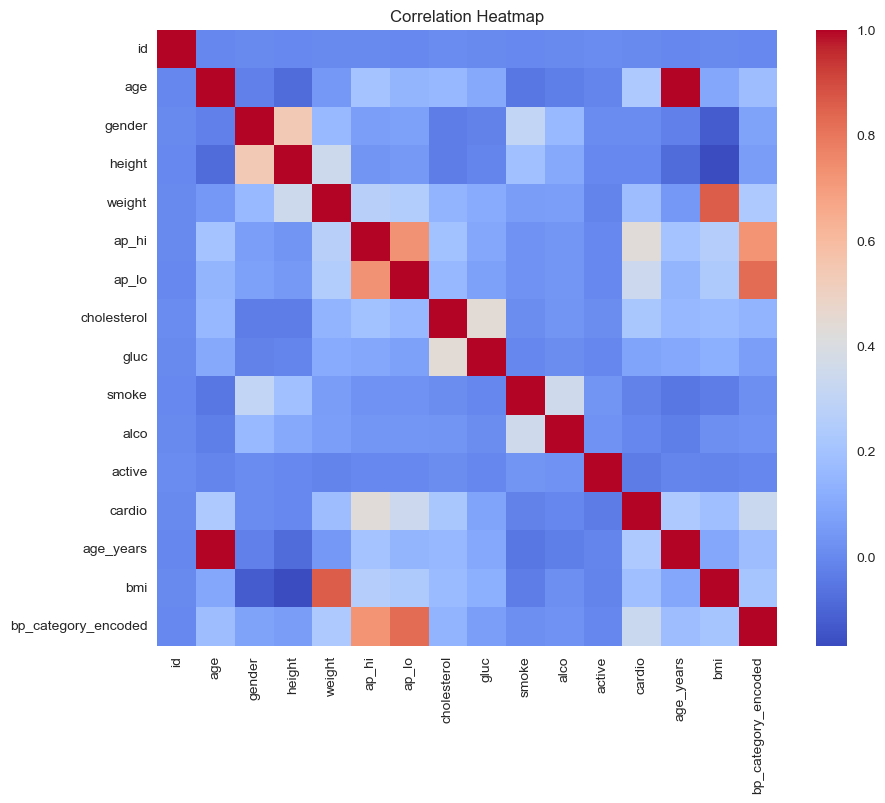

In [363]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Data Cleaning 

In [430]:
df = df.drop(df[df['age_years'] < 30].index)
df = df.drop(df[df['height'] < 140].index)
df = df.drop(df[df['weight'] < 40].index)
df = df.drop(df.loc[df['bmi'] < 15].index)
df.reset_index(inplace=True, drop=True)

In [ ]:
gender_counts = df['gender'].value_counts()
min_gender_count = min(gender_counts)

df = df.groupby('gender').apply(lambda x: x.sample(n=min_gender_count)).reset_index(drop=True)

In [268]:
translation = {'Normal': 0, 
              'Elevated': 1,
              'Hypertension Stage 1': 2,
              'Hypertension Stage 2': 3,
              'Hypertensive Crisis': 4}

df['bp_category_encoded'] = df['bp_category_encoded'].map(translation)


In [339]:
translate = {1: 'Female',
            2: 'Male'}

df['gender_name'] = df['gender'].map(translate)

In [355]:
trans = {1: 'Normal',
        2: 'Above Normal',
        3:'Well Above Normal'}
df['cholesterol_cat'] = df['cholesterol'].map(trans)

In [360]:
tran = {1: 'Normal',
        2: 'Above Normal',
        3:'Well Above Normal'}
df['glucose_cat'] = df['gluc'].map(tran)

### EDA 

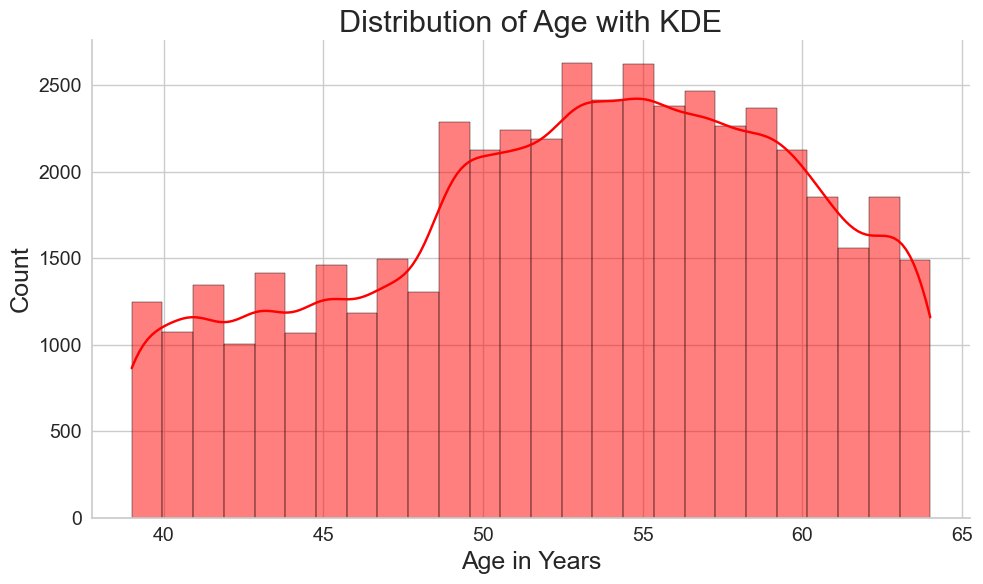

In [628]:
plt.figure(figsize=(10, 6))

# Plotting the histogram with KDE
sns.histplot(df_filtered['age_years'], bins=26, kde=True, color='red')

# Descriptive title and labels
plt.title('Distribution of Age with KDE', fontsize=22)
plt.xlabel('Age in Years', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Remove top and right spines for aesthetics
sns.despine()

# Display the plot
plt.tight_layout()
plt.show()

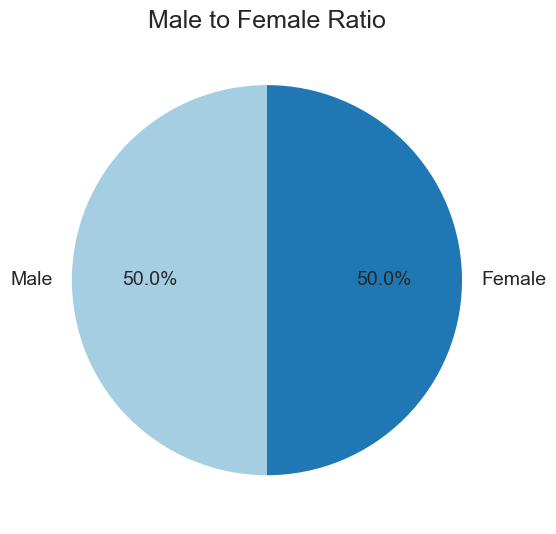

In [543]:
gender_counts = df['gender_name'].value_counts()
#labels_gender = ['Female' if index ==  else 'Male' for index in gender_counts.index]
textprops = {'fontsize': 14}
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, textprops=textprops)

plt.title('Male to Female Ratio', fontsize=18)
plt.tight_layout()
plt.show()

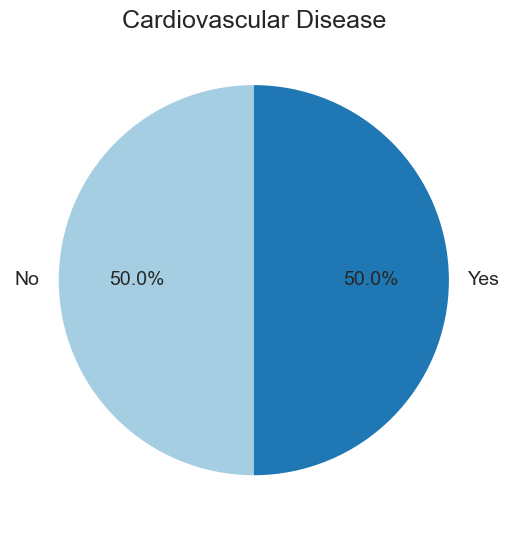

In [545]:
cardio_counts = df['cardio'].value_counts()
labels_cardio = ['Yes' if index == 1 else 'No' for index in cardio_counts.index]
textprops = {'fontsize': 14}
plt.pie(gender_counts, labels=labels_cardio, autopct='%1.1f%%', startangle=90, textprops=textprops)

plt.title('Cardiovascular Disease', fontsize=18)
plt.tight_layout()
plt.show()

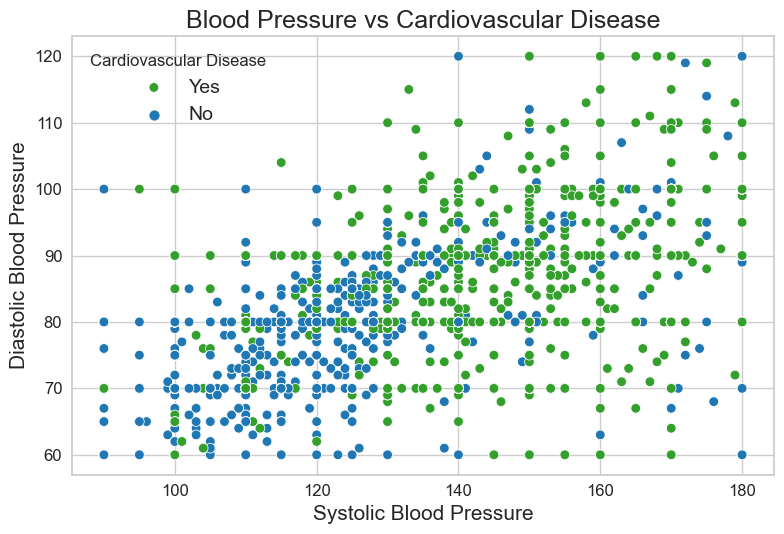

In [617]:
colors = sns.color_palette("Paired")[1:5:2]  # Picking dark blue and orange

sns.scatterplot(df, x='ap_hi', y='ap_lo', hue='cardio', palette=colors)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('Systolic Blood Pressure', fontsize=15)
plt.ylabel('Diastolic Blood Pressure', fontsize=15)
plt.legend(title="Cardiovascular Disease", labels=["Yes", "No"], fontsize=14)

plt.title('Blood Pressure vs Cardiovascular Disease', fontsize=18)
plt.tight_layout()
plt.show()

In [416]:
# Ensuring all combinations are present using `crosstab` and then resetting the index
pivot = pd.crosstab(index=df['bp_category'], columns=df['cardio']).reset_index()
pivot = pivot.set_index('bp_category')

desired_order = ['Normal', 'Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2']
pivot = pivot.reindex(desired_order)
pivot

cardio,0,1
bp_category,,
Normal,4768,1397
Elevated,1489,673
Hypertension Stage 1,15504,12332
Hypertension Stage 2,2265,9024


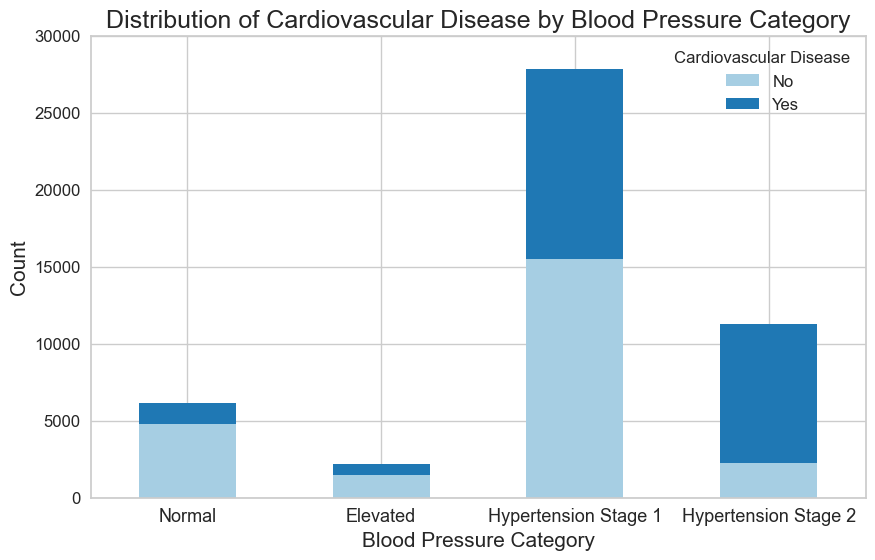

In [627]:
pivot.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title("Distribution of Cardiovascular Disease by Blood Pressure Category", fontsize=18)
plt.ylabel("Count", fontsize=15)
plt.xlabel("Blood Pressure Category", fontsize=15)
plt.xticks(rotation=0, fontsize=13)
plt.yticks(range(0, 30001, 5000), fontsize=12)
plt.legend(title="Cardiovascular Disease", labels=["No", "Yes"], fontsize=12)
plt.show()

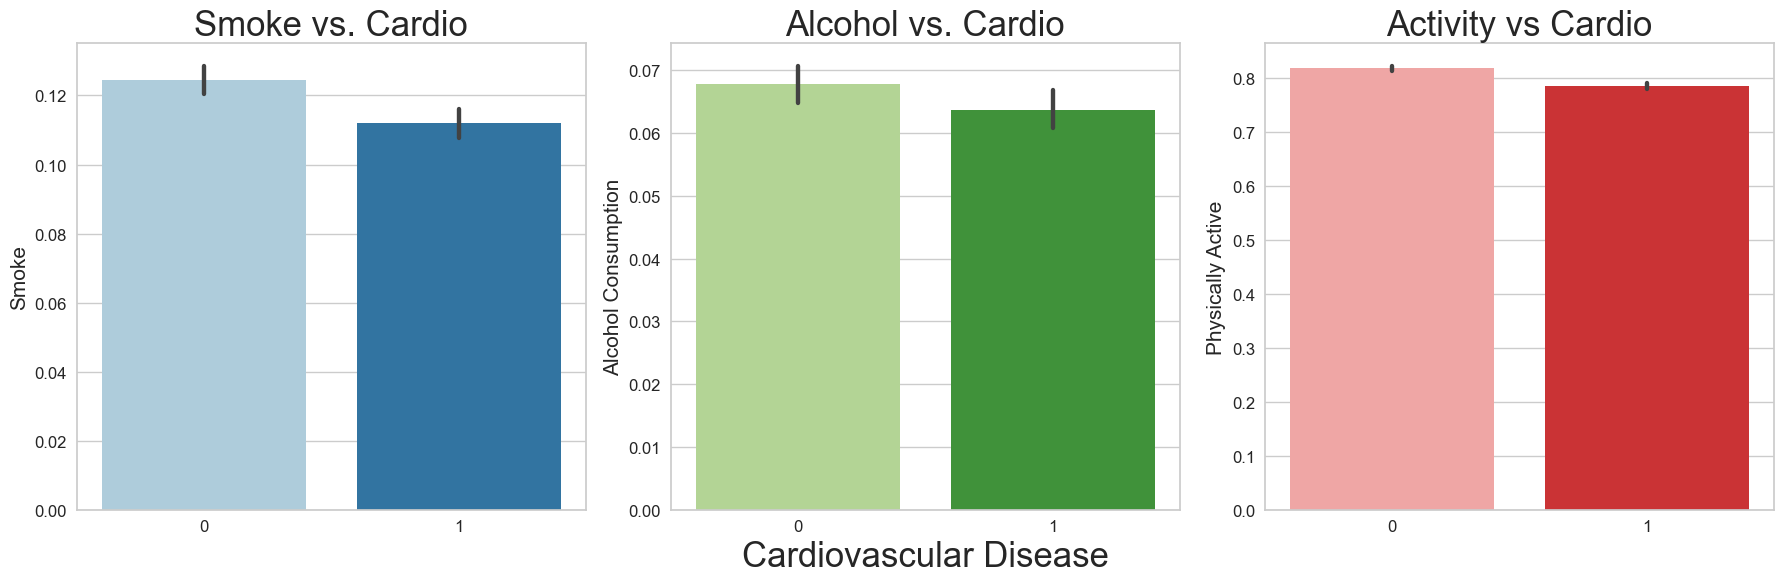

In [651]:
import seaborn as sns
import matplotlib.pyplot as plt
colors1 = sns.color_palette("Paired")[0:2]  # Picking dark blue and orange
colors2 = sns.color_palette("Paired")[2:4]  # Picking dark blue and orange
colors3 = sns.color_palette("Paired")[4:6]  # Picking dark blue and orange

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Box plot for smoke vs. cardio
sns.barplot(y='smoke', x='cardio', data=df, ax=axes[0], palette=colors1)
axes[0].set_title('Smoke vs. Cardio', fontsize=25)
axes[0].set_xlabel('', fontsize=15)
axes[0].set_ylabel('Smoke', fontsize=15)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)


# Box plot for alco vs. cardio
sns.barplot(y='alco', x='cardio', data=df, ax=axes[1], palette=colors2)
axes[1].set_title('Alcohol vs. Cardio', fontsize=25)
axes[1].set_xlabel('Cardiovascular Disease', fontsize=25)
axes[1].set_ylabel('Alcohol Consumption', fontsize=15)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

# Box plot for gluc vs. cardio
sns.barplot(y='active', x='cardio', data=df, ax=axes[2], palette=colors3)
axes[2].set_title('Activity vs Cardio', fontsize=25)
axes[2].set_ylabel('Physically Active', fontsize=15)
axes[2].set_xlabel('', fontsize=15)
axes[2].tick_params(axis='x', labelsize=12)
axes[2].tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()

In [330]:
df.groupby('gender')[['gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years',
       'bmi', 'bp_category_encoded']].mean()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category_encoded
gender,,,,,,,,,,,,,,
1,1.0,161.503625,72.583298,125.633904,80.779019,1.375495,1.229832,0.018081,0.025963,0.799376,0.489421,52.929950,27.885828,1.860743
2,2.0,170.046826,77.169203,127.765152,82.093315,1.328964,1.208084,0.218326,0.105580,0.806499,0.497935,52.600312,26.641866,2.004257


### Clustering

In [15]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [489]:
df_filtered = df[['gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years',
       'bmi', 'bp_category_encoded']]

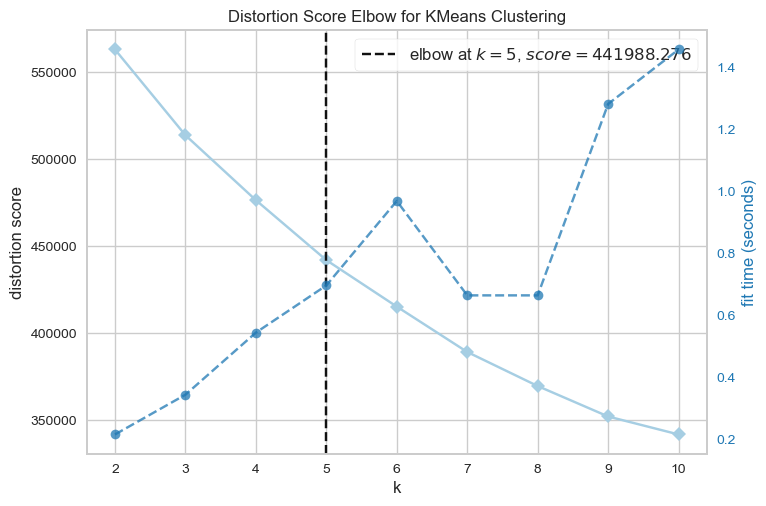

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [490]:
pipe = make_pipeline(StandardScaler(), KElbowVisualizer(KMeans(n_init=10)))
pipe.fit(df_filtered)
pipe[1].show()

### Pipeline with KMeans=4

In [491]:
scaler = StandardScaler()
cluster = KMeans(n_clusters=4, n_init=10, random_state=30)
pipe = make_pipeline(scaler, cluster)

pipe.fit(df_filtered)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=4, n_init=10, random_state=30))])

In [492]:
df_filtered['clusters'] = pipe['kmeans'].labels_


C:\Users\oscfa\AppData\Local\Temp\ipykernel_3828\2149844998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['clusters'] = pipe['kmeans'].labels_


In [499]:
df_filtered

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category_encoded,clusters,cluster_name
0,1,168,90.0,140,80,1,1,0,0,1,1,47,31.887755,2,0,Obese
1,1,163,85.0,120,80,1,1,0,0,1,0,43,31.992171,2,1,Role Models
2,1,160,56.0,110,70,1,1,0,0,0,0,49,21.875000,0,1,Role Models
3,1,165,88.0,140,90,2,1,0,0,0,0,53,32.323232,3,0,Obese
4,1,165,73.0,120,80,1,1,0,0,1,0,54,26.813590,2,1,Role Models
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47444,2,195,117.0,130,80,3,3,0,0,1,1,46,30.769231,2,0,Obese
47445,2,171,75.0,140,90,1,1,0,0,0,1,52,25.648918,3,0,Obese
47446,2,165,70.0,120,80,1,1,0,0,1,0,48,25.711662,2,2,Healthy Males
47447,2,169,72.0,130,90,1,1,0,0,1,1,55,25.209201,2,2,Healthy Males


In [287]:
df_filtered.clusters.value_counts()

1    15239
2    14753
0    14398
3     3062
Name: clusters, dtype: int64

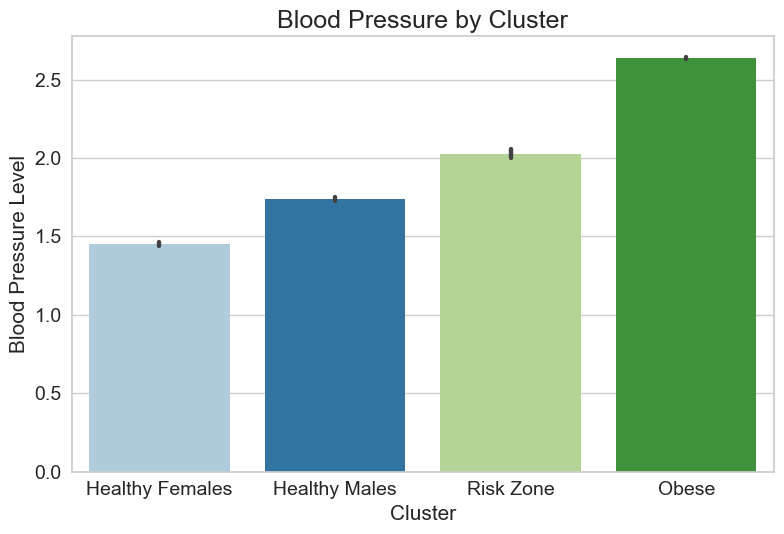

In [631]:
order = ['Healthy Females', 'Healthy Males', 'Risk Zone', 'Obese']
sns.barplot(df_filtered, x='cluster_name', y='bp_category_encoded', order=order)
plt.xlabel('Cluster', fontsize=15)
plt.ylabel('Blood Pressure Level', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title('Blood Pressure by Cluster', fontsize=18)
plt.tight_layout()
plt.show()

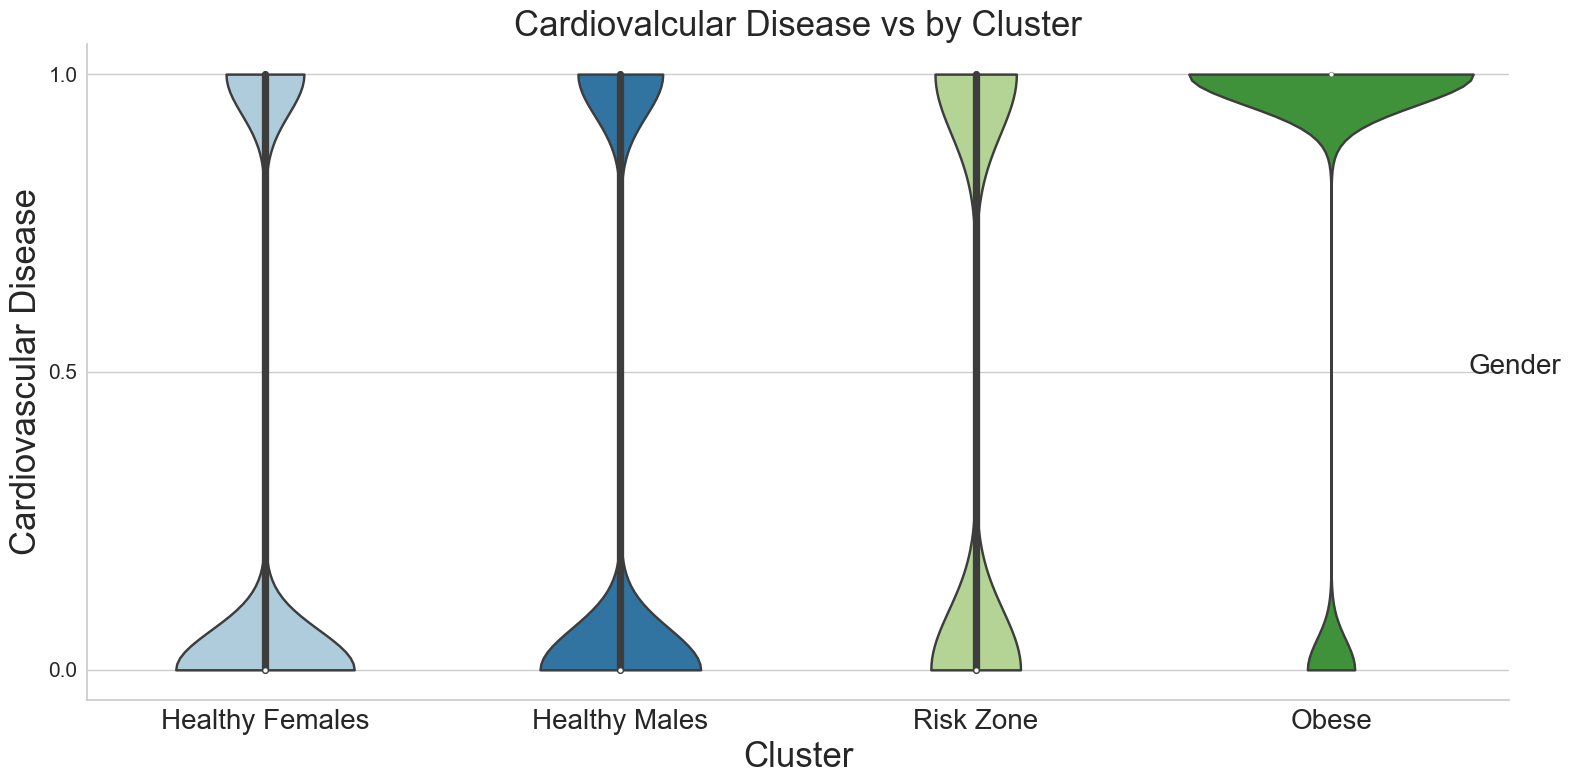

In [574]:
order = ['Healthy Females', 'Healthy Males', 'Risk Zone', 'Obese']

sns.catplot(
    data=df_filtered, x="cluster_name", y="cardio", kind="violin",
    cut=0, palette=palette, height=8, aspect=2, legend=False, order=order)

plt.yticks([0, 0.5, 1], fontsize=15)
plt.xticks(fontsize=20)
plt.xlabel('Cluster', fontsize=25)
plt.ylabel('Cardiovascular Disease', fontsize=25)

handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Female' if label == '1' else 'Male' for label in labels]
plt.legend(handles, labels, title='Gender', fontsize=15, title_fontsize=20, bbox_to_anchor=(1.05, 0.5), loc='center right')

plt.title('Cardiovalcular Disease vs by Cluster', fontsize=25)
plt.tight_layout()
plt.show()

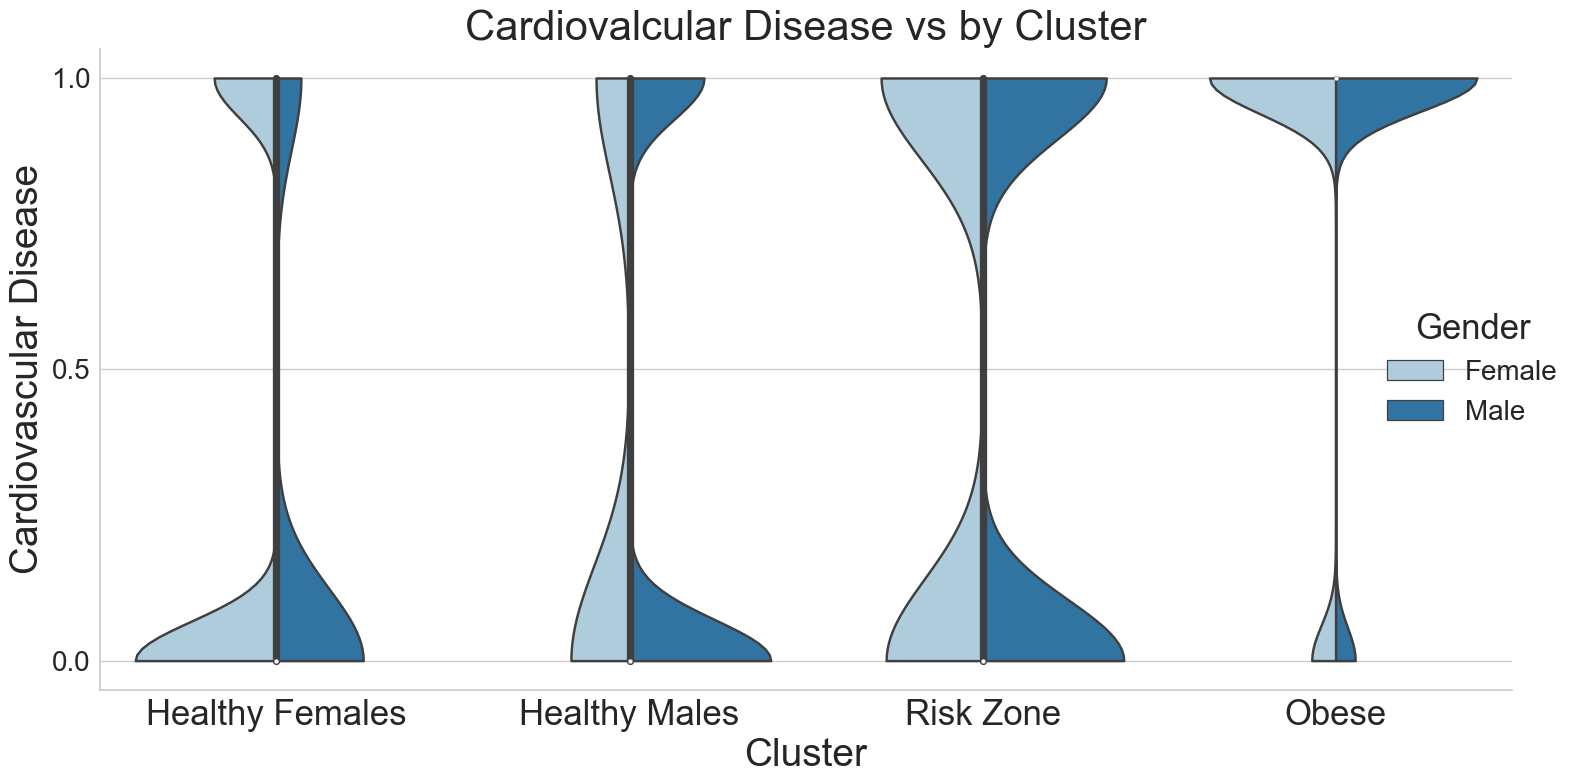

In [634]:
order = ['Healthy Females', 'Healthy Males', 'Risk Zone', 'Obese']

sns.catplot(
    data=df_filtered, x="cluster_name", y="cardio", kind="violin", hue='gender', split=True,
    cut=0, palette=palette, height=8, aspect=2, legend=False, order=order)

plt.yticks([0, 0.5, 1], fontsize=20)
plt.xticks(fontsize=25)
plt.xlabel('Cluster', fontsize=28)
plt.ylabel('Cardiovascular Disease', fontsize=28)

handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Female' if label == '1' else 'Male' for label in labels]
plt.legend(handles, labels, title='Gender', fontsize=20, title_fontsize=25, bbox_to_anchor=(1.05, 0.5), loc='center right')

plt.title('Cardiovalcular Disease vs by Cluster', fontsize=30)
plt.tight_layout()
plt.show()

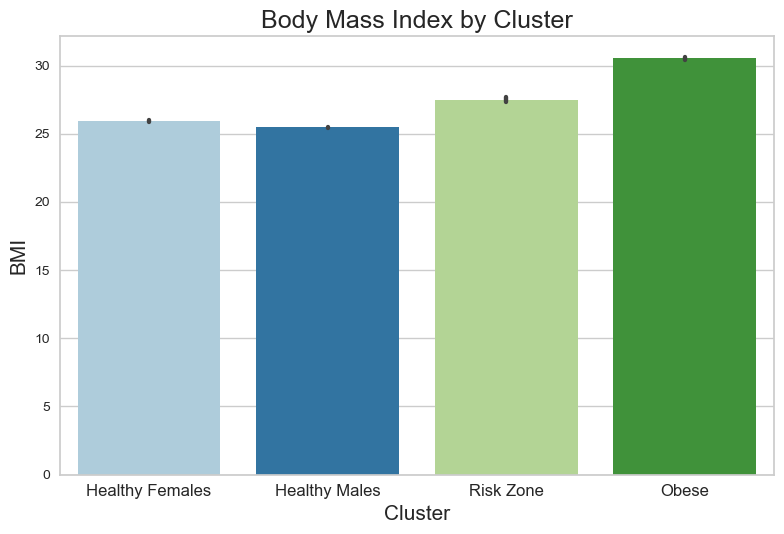

In [582]:
order = ['Healthy Females', 'Healthy Males', 'Risk Zone', 'Obese']
sns.barplot(df_filtered, x='cluster_name', y='bmi', order=order)
plt.xlabel('Cluster', fontsize=15)
plt.ylabel('BMI', fontsize=15)
plt.xticks(fontsize=12)
plt.title('Body Mass Index by Cluster', fontsize=18)
plt.tight_layout()
plt.show()

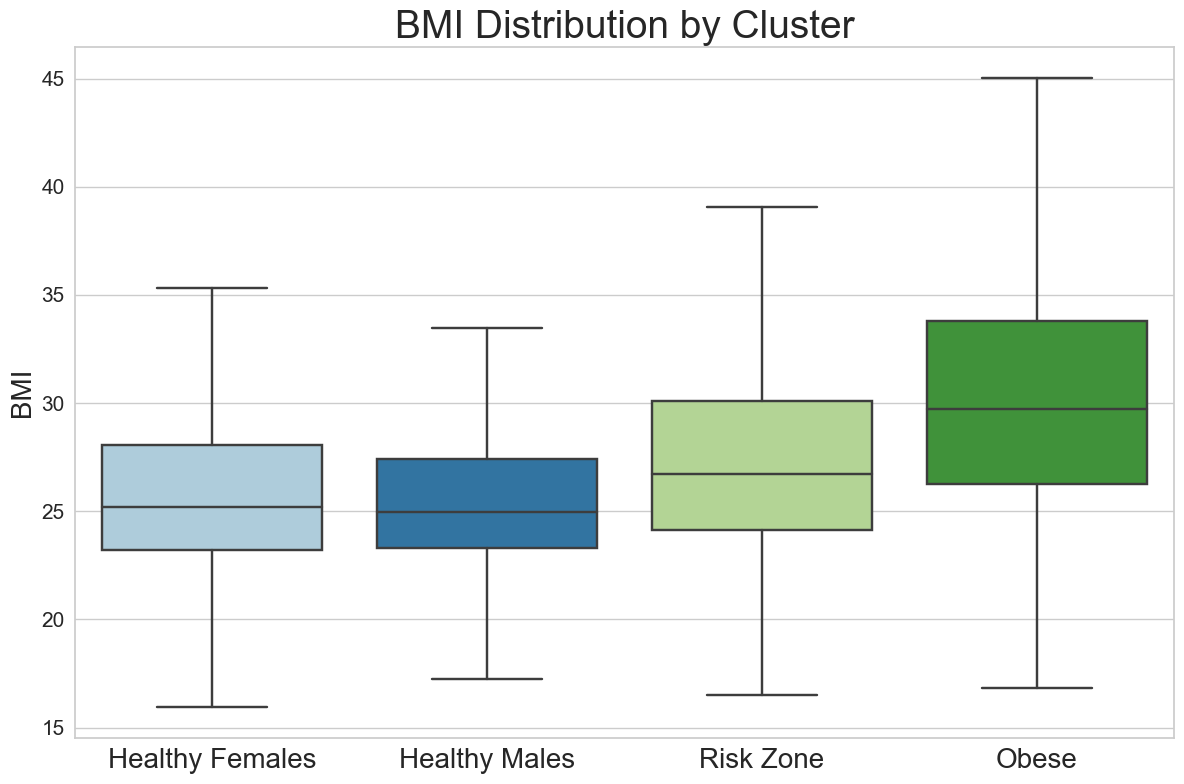

In [637]:
order = ['Healthy Females', 'Healthy Males', 'Risk Zone', 'Obese']

plt.figure(figsize=(12, 8))
sns.boxplot(x='cluster_name', y='bmi', data=df_filtered, order=order, showfliers=False)
plt.title('BMI Distribution by Cluster', fontsize=28)
plt.xlabel('', fontsize=14)
plt.ylabel('BMI', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()

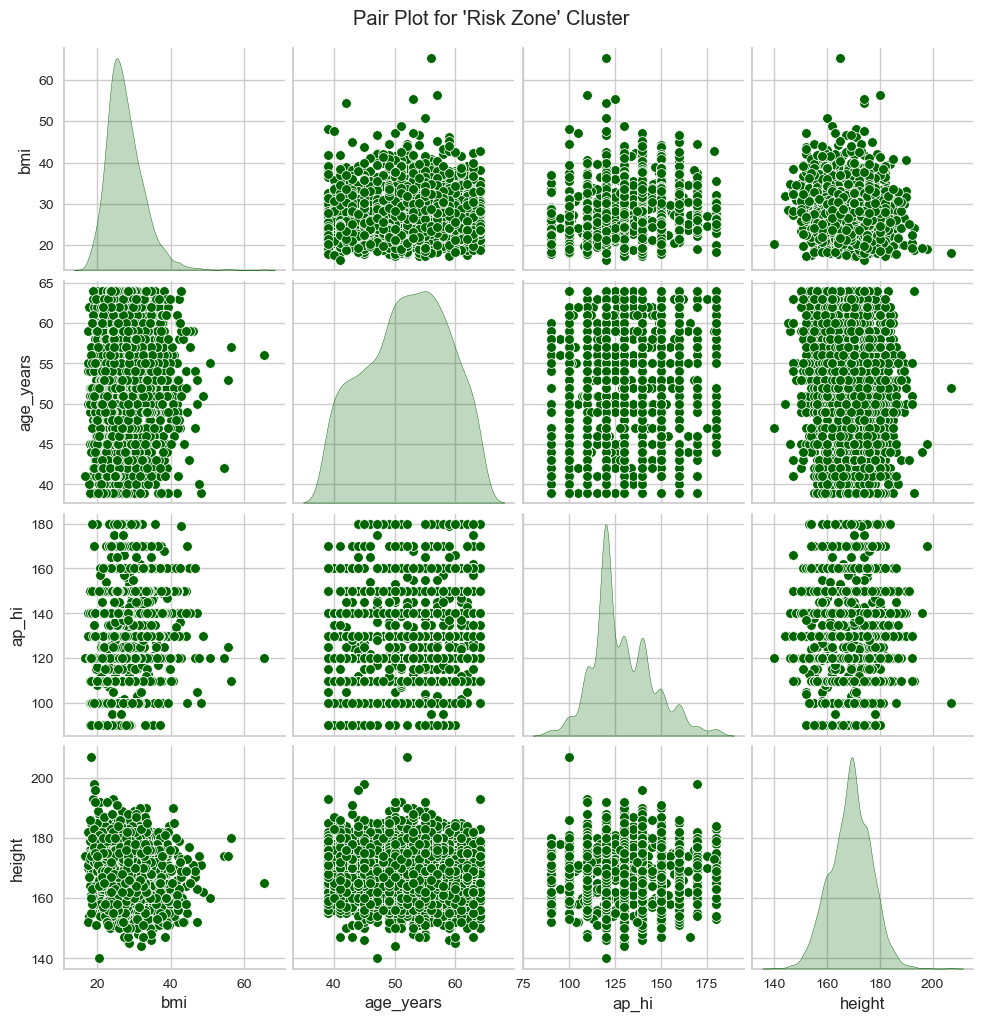

In [610]:

risk_zone_data = df_filtered[df_filtered['cluster_name'] == 'Risk Zone']

# Use a pair plot with dark green color
sns.pairplot(risk_zone_data[['bmi', 'age_years', 'ap_hi', 'height']], kind='scatter', diag_kind='kde', plot_kws={'color': 'darkgreen'}, diag_kws={'color': 'darkgreen'})
plt.suptitle("Pair Plot for 'Risk Zone' Cluster", y=1.02)
plt.show()


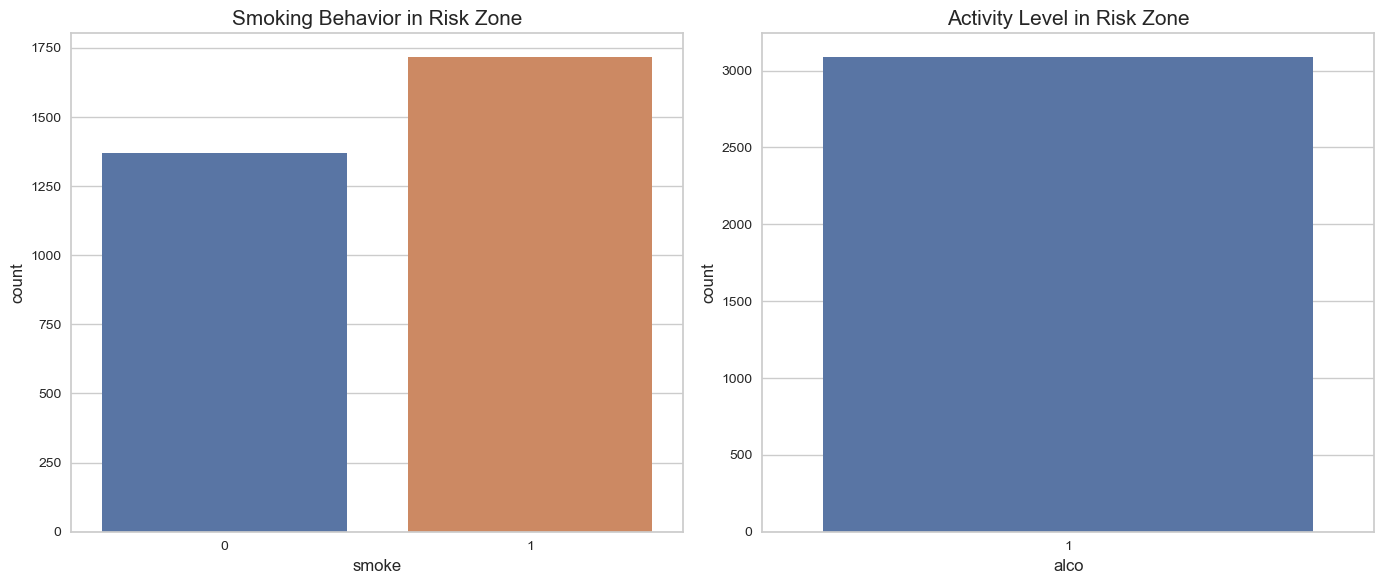

In [688]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

sns.countplot(x='smoke', data=risk_zone_data, ax=axes[0], palette='deep')
axes[0].set_title('Smoking Behavior in Risk Zone', fontsize=15)

sns.countplot(x='alco', data=risk_zone_data, ax=axes[1], palette='deep')
axes[1].set_title('Activity Level in Risk Zone', fontsize=15)

plt.tight_layout()
plt.show()


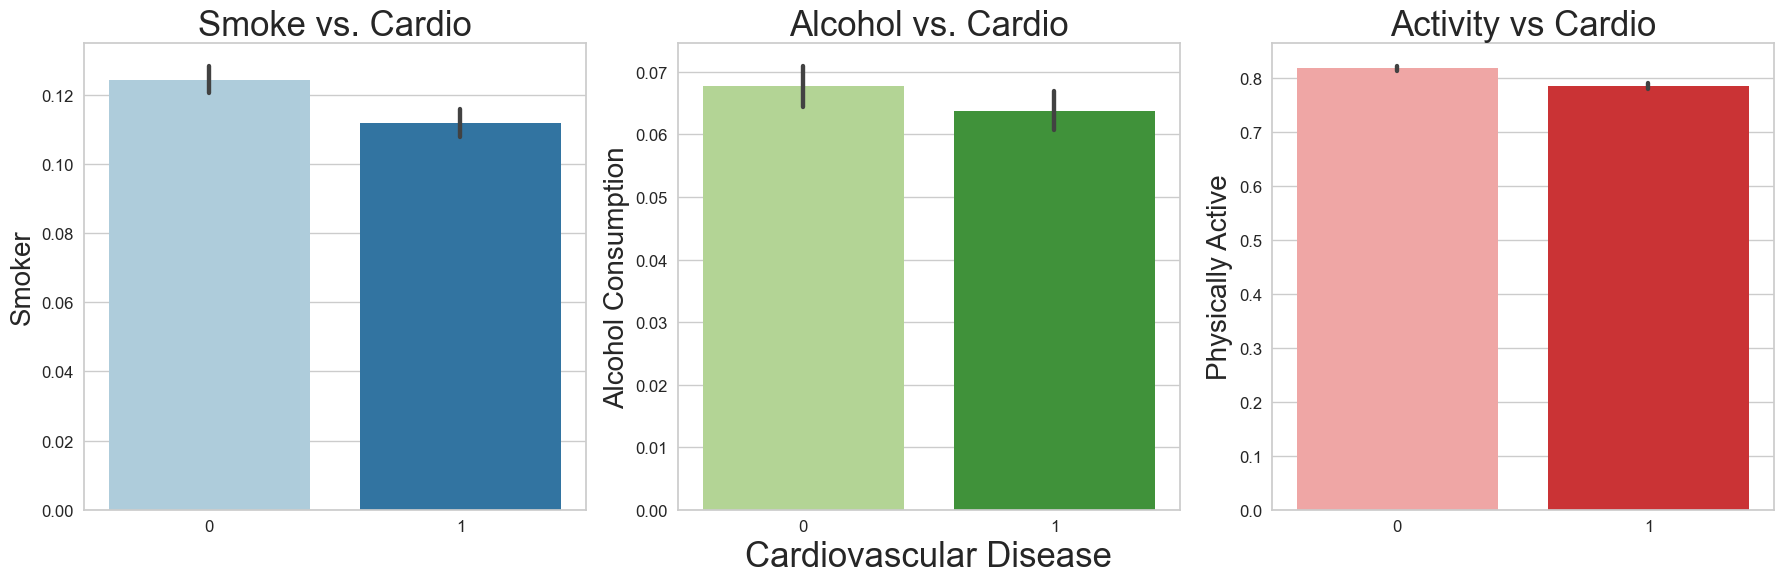

In [727]:
import seaborn as sns
import matplotlib.pyplot as plt
colors1 = sns.color_palette("Paired")[0:2]  # Picking dark blue and orange
colors2 = sns.color_palette("Paired")[2:4]  # Picking dark blue and orange
colors3 = sns.color_palette("Paired")[4:6]  # Picking dark blue and orange

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Box plot for smoke vs. cardio
sns.barplot(y='smoke', x='cardio', data=df_filtered, ax=axes[0], palette=colors1)
axes[0].set_title('Smoke vs. Cardio', fontsize=25)
axes[0].set_xlabel('', fontsize=15)
axes[0].set_ylabel('Smoker', fontsize=20)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)


# Box plot for alco vs. cardio
sns.barplot(y='alco', x='cardio', data=df_filtered, ax=axes[1], palette=colors2)
axes[1].set_title('Alcohol vs. Cardio', fontsize=25)
axes[1].set_xlabel('Cardiovascular Disease', fontsize=25)
axes[1].set_ylabel('Alcohol Consumption', fontsize=20)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

# Box plot for gluc vs. cardio
sns.barplot(y='active', x='cardio', data=df_filtered, ax=axes[2], palette=colors3)
axes[2].set_title('Activity vs Cardio', fontsize=25)
axes[2].set_ylabel('Physically Active', fontsize=20)
axes[2].set_xlabel('', fontsize=15)
axes[2].tick_params(axis='x', labelsize=12)
axes[2].tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()

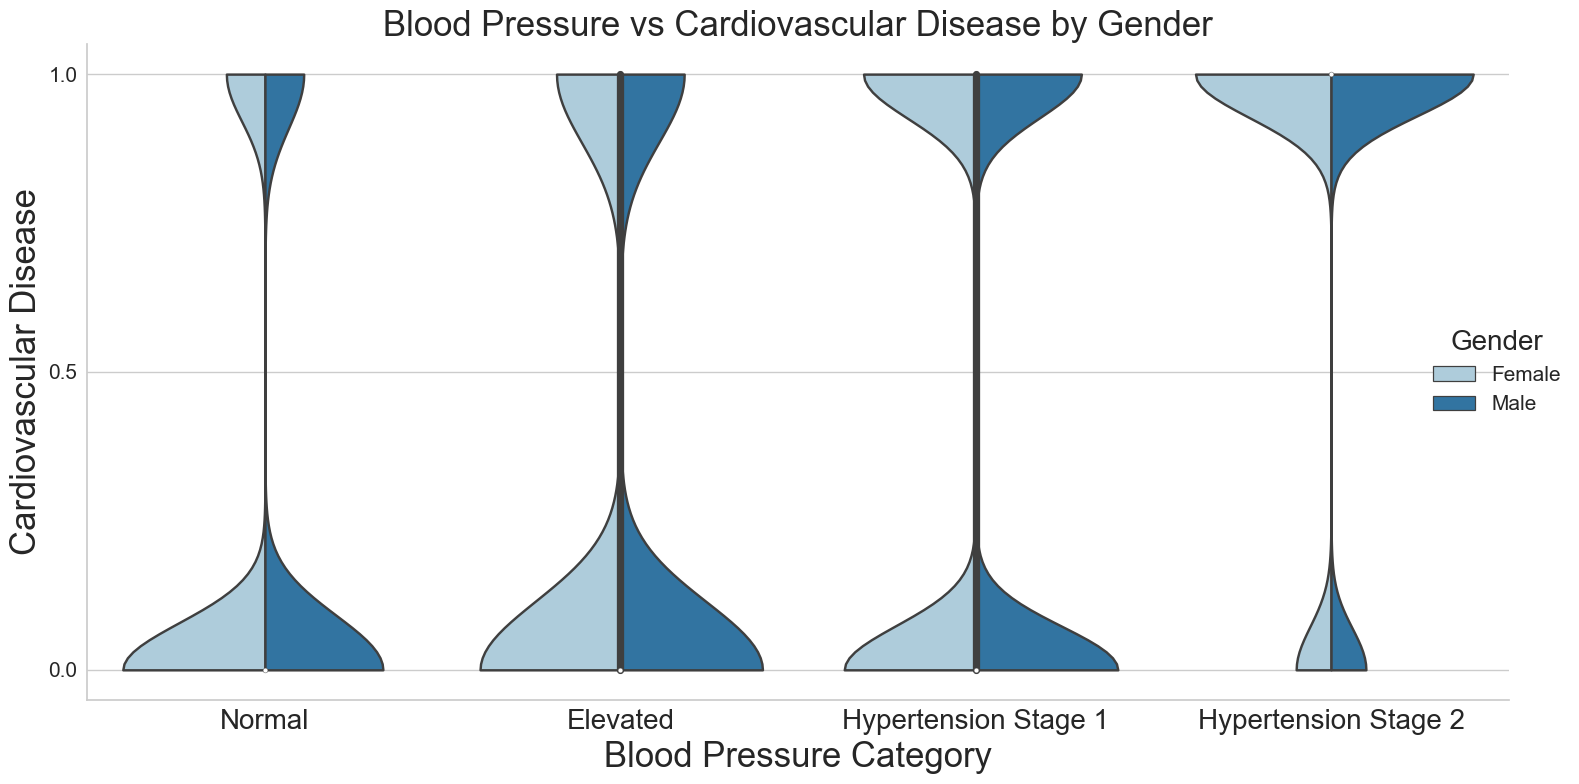

In [522]:
desired_order = ['Normal', 'Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2']

sns.catplot(
    data=df, x="bp_category", y="cardio", kind="violin", hue='gender_name', split=True,
    cut=0, palette=palette, height=8, aspect=2, legend=False, order=desired_order)

plt.yticks([0, 0.5, 1], fontsize=15)
plt.xticks(fontsize=20)
plt.xlabel('Blood Pressure Category', fontsize=25)
plt.ylabel('Cardiovascular Disease', fontsize=25)
plt.legend(
    title='Gender', fontsize=15, title_fontsize=20,
    bbox_to_anchor=(1.05, 0.5), loc='center right')

plt.title('Blood Pressure vs Cardiovascular Disease by Gender', fontsize=25)
plt.tight_layout()
plt.show()

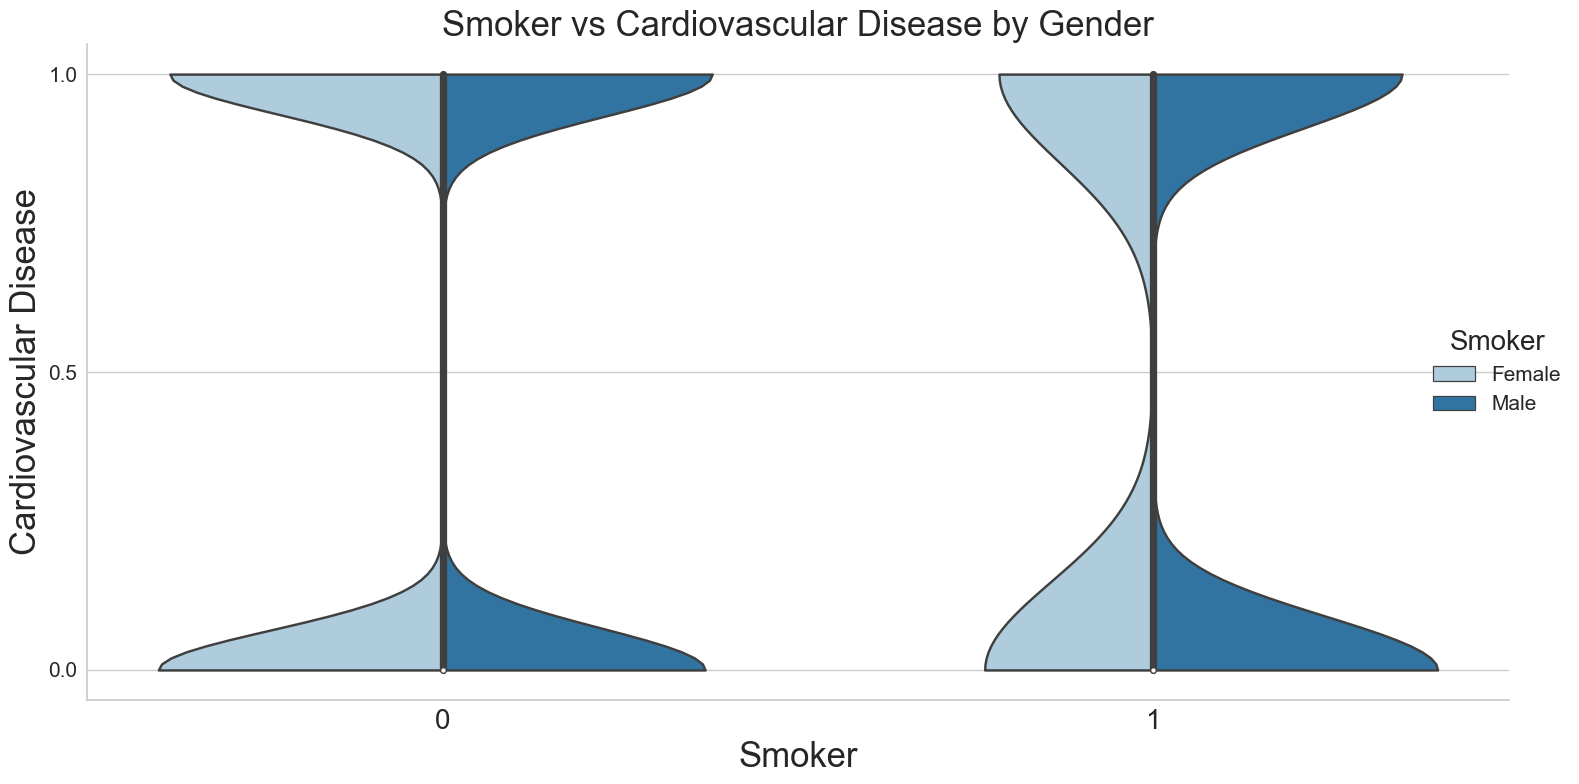

In [350]:
desired_order = ['Normal', 'Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2']

sns.catplot(
    data=df, x="smoke", y="cardio", kind="violin", hue='gender_name', split=True,
    cut=0, palette=palette, height=8, aspect=2, legend=False)

plt.yticks([0, 0.5, 1], fontsize=15)
plt.xticks(fontsize=20)
plt.xlabel('Smoker', fontsize=25)
plt.ylabel('Cardiovascular Disease', fontsize=25)
plt.legend(
    title='Smoker', fontsize=15, title_fontsize=20,
    bbox_to_anchor=(1.05, 0.5), loc='center right')

plt.title('Smoker vs Cardiovascular Disease by Gender', fontsize=25)
plt.tight_layout()
plt.show()

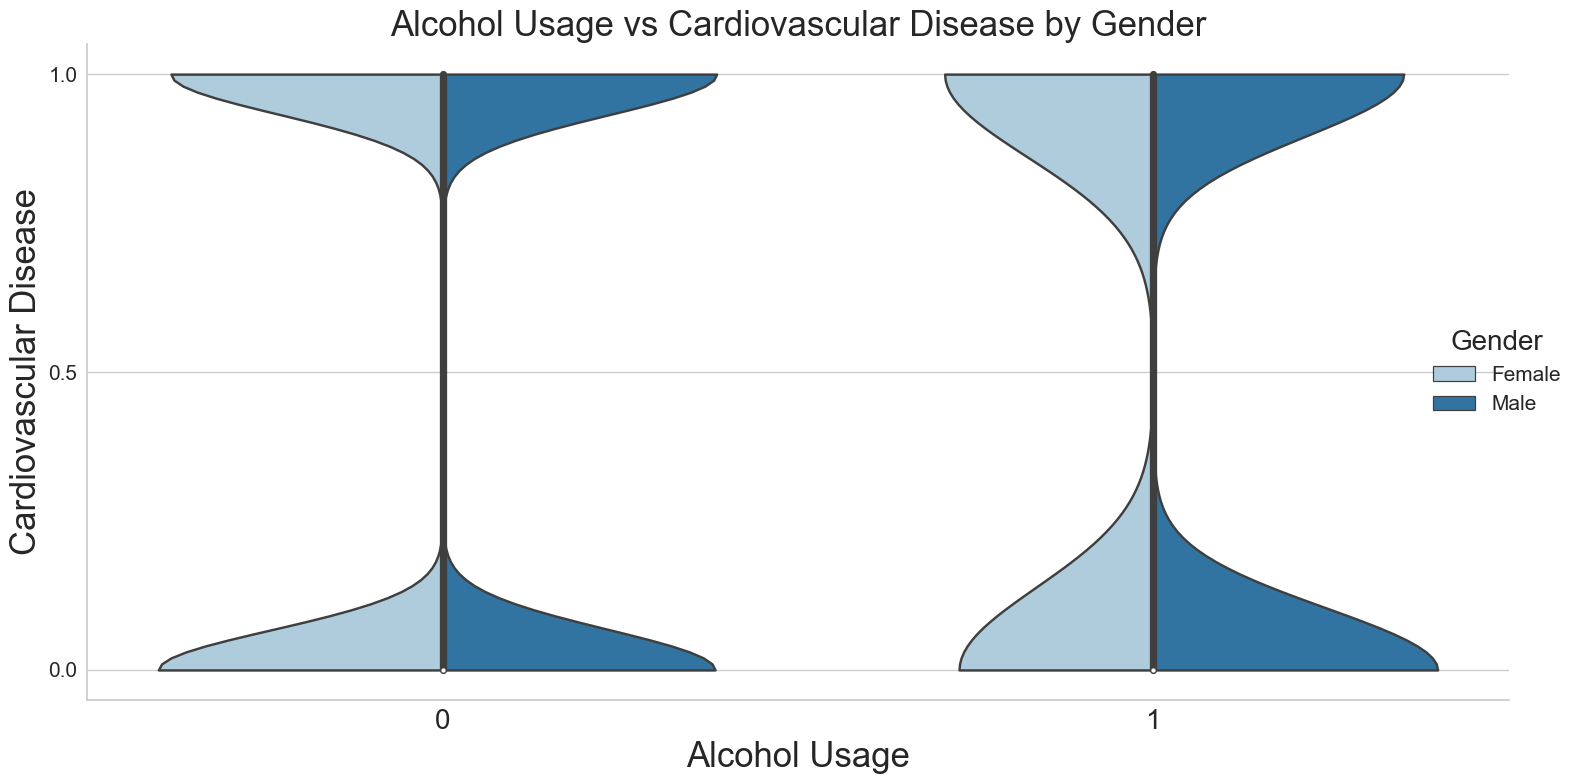

In [354]:
desired_order = ['Normal', 'Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2']

sns.catplot(
    data=df, x="alco", y="cardio", kind="violin", hue='gender_name', split=True,
    cut=0, palette=palette, height=8, aspect=2, legend=False)

plt.yticks([0, 0.5, 1], fontsize=15)
plt.xticks(fontsize=20)
plt.xlabel('Alcohol Usage', fontsize=25)
plt.ylabel('Cardiovascular Disease', fontsize=25)
plt.legend(
    title='Gender', fontsize=15, title_fontsize=20,
    bbox_to_anchor=(1.05, 0.5), loc='center right')

plt.title('Alcohol Usage vs Cardiovascular Disease by Gender', fontsize=25)
plt.tight_layout()
plt.show()

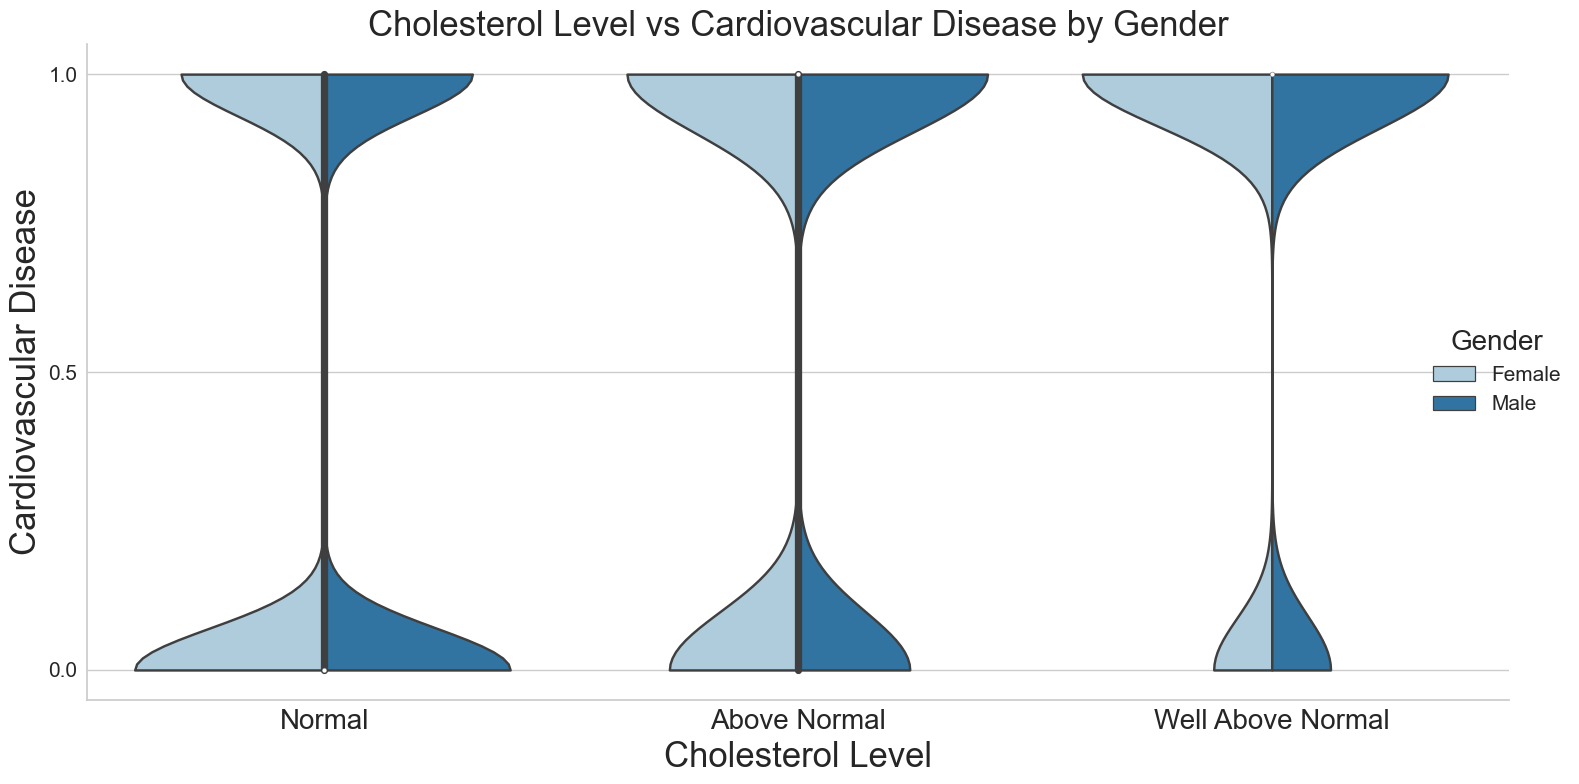

In [357]:
desired_order = ['Normal', 'Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2']

sns.catplot(
    data=df, x="cholesterol_cat", y="cardio", kind="violin", hue='gender_name', split=True,
    cut=0, palette=palette, height=8, aspect=2, legend=False)

plt.yticks([0, 0.5, 1], fontsize=15)
plt.xticks(fontsize=20)
plt.xlabel('Cholesterol Level', fontsize=25)
plt.ylabel('Cardiovascular Disease', fontsize=25)
plt.legend(
    title='Gender', fontsize=15, title_fontsize=20,
    bbox_to_anchor=(1.05, 0.5), loc='center right')

plt.title('Cholesterol Level vs Cardiovascular Disease by Gender', fontsize=25)
plt.tight_layout()
plt.show()

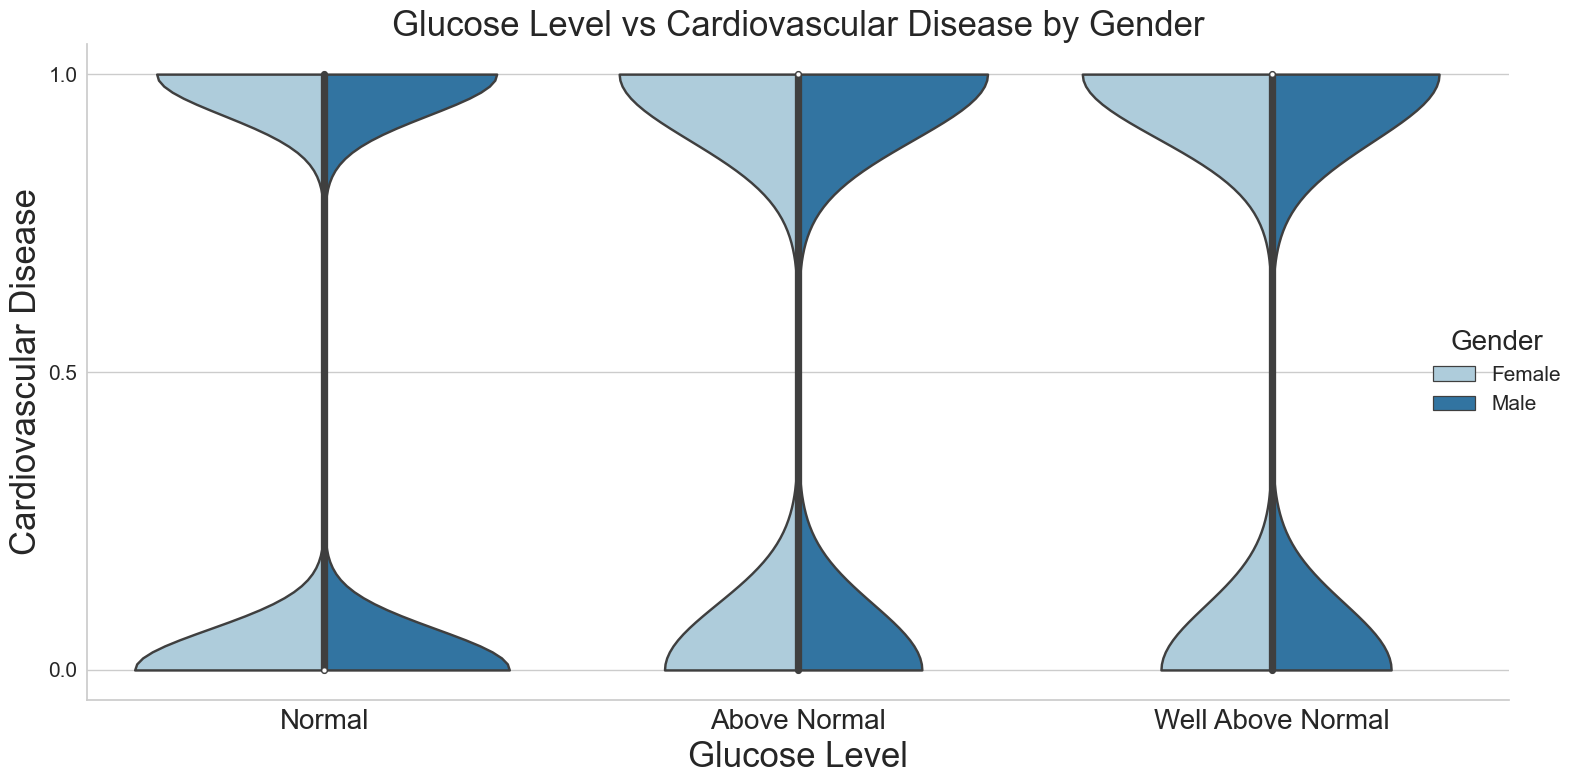

In [362]:
desired_order = ['Normal', 'Above Normal', 'Well Above Normal']

sns.catplot(
    data=df, x="glucose_cat", y="cardio", kind="violin", hue='gender_name', split=True,
    cut=0, palette=palette, height=8, aspect=2, legend=False, order=desired_order)

plt.yticks([0, 0.5, 1], fontsize=15)
plt.xticks(fontsize=20)
plt.xlabel('Glucose Level', fontsize=25)
plt.ylabel('Cardiovascular Disease', fontsize=25)
plt.legend(
    title='Gender', fontsize=15, title_fontsize=20,
    bbox_to_anchor=(1.05, 0.5), loc='center right')

plt.title('Glucose Level vs Cardiovascular Disease by Gender', fontsize=25)
plt.tight_layout()
plt.show()

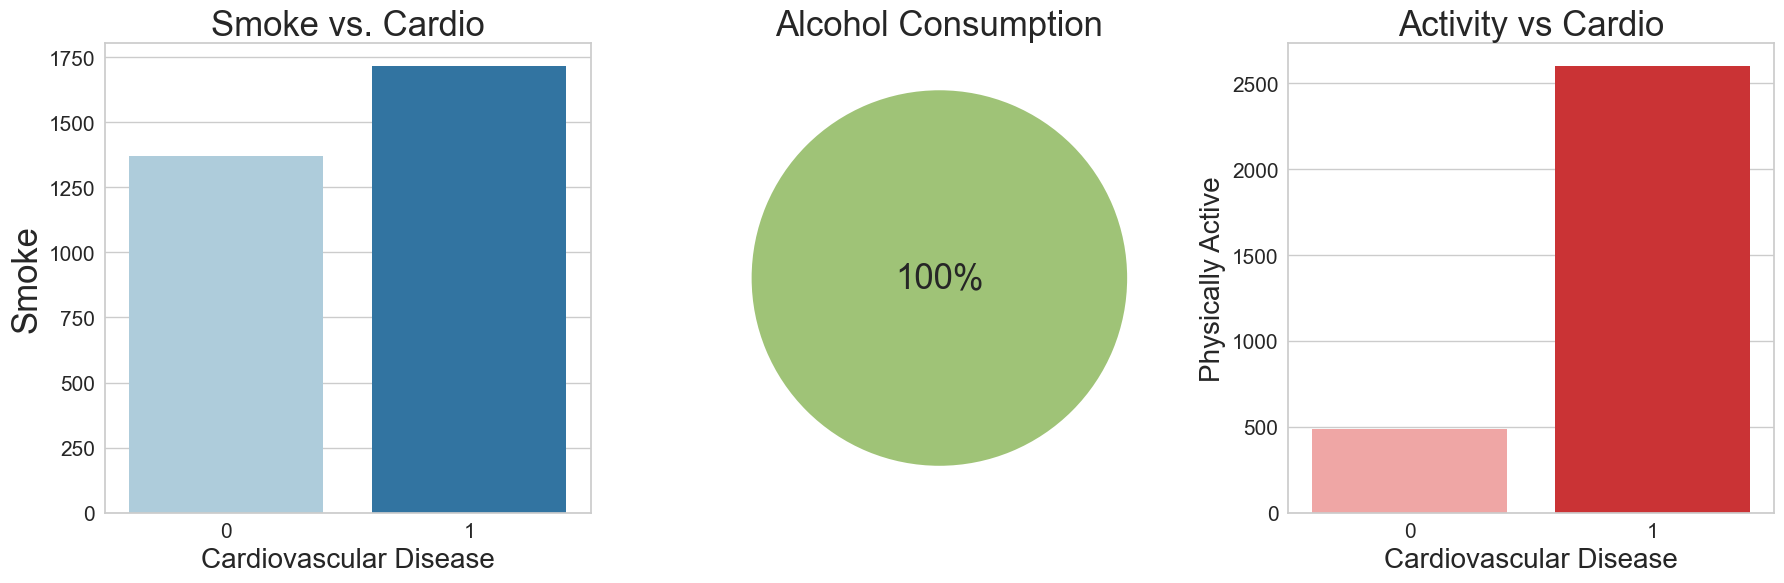

In [731]:
import seaborn as sns
import matplotlib.pyplot as plt
colors1 = sns.color_palette("Paired")[0:2]  # Picking dark blue and orange
colors2 = sns.color_palette("Paired")[2:4]  # Picking dark blue and orange
colors3 = sns.color_palette("Paired")[4:6]  # Picking dark blue and orange

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Box plot for smoke vs. cardio
sns.countplot(x='smoke', data=risk_zone, ax=axes[0], palette=colors1)
axes[0].set_title('Smoke vs. Cardio', fontsize=25)
axes[0].set_xlabel('Cardiovascular Disease', fontsize=20)
axes[0].set_ylabel('Smoke', fontsize=25)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)


# Pie for alco
alco_counts = risk_zone['alco'].value_counts()
textprops = {'fontsize': 14}
axes[1].pie(alco_counts, startangle=90, textprops=textprops, colors='g')
axes[1].set_title("Alcohol Consumption", fontsize=25)
axes[1].text(0.5, 0.5, "100%", ha='center', va='center', fontsize=25, transform=axes[1].transAxes)

# Box plot for gluc vs. cardio
sns.countplot(x='active', data=risk_zone, ax=axes[2], palette=colors3)
axes[2].set_title('Activity vs Cardio', fontsize=25)
axes[2].set_ylabel('Physically Active', fontsize=20)
axes[2].set_xlabel('Cardiovascular Disease', fontsize=20)
axes[2].tick_params(axis='x', labelsize=15)
axes[2].tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

In [700]:
risk_zone.smoke.value_counts()

1    1717
0    1371
Name: smoke, dtype: int64

In [523]:
translate = {0: 'Obese',
            1: 'Healthy Females',
            2: 'Healthy Males',
            3: 'Risk Zone'}

df_filtered['cluster_name'] = df_filtered['clusters'].map(translate)

C:\Users\oscfa\AppData\Local\Temp\ipykernel_3828\197033703.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['cluster_name'] = df_filtered['clusters'].map(translate)


In [636]:
df_filtered.loc[df_filtered['clusters'] == 3].mean(numeric_only=True)

gender                   1.809262
height                 168.893459
weight                  78.427720
ap_hi                  128.833549
ap_lo                   82.756153
cholesterol              1.437500
gluc                     1.238666
smoke                    0.556023
alco                     1.000000
active                   0.842940
cardio                   0.475712
age_years               51.951749
bmi                     27.502520
bp_category_encoded      2.027202
clusters                 3.000000
dtype: float64

In [158]:
df_filtered.groupby('cardio')['gender'].value_counts(normalize=True)

cardio  gender
0       1         0.504070
        2         0.495930
1       2         0.504174
        1         0.495826
Name: gender, dtype: float64

In [135]:
df.gender.value_counts()

1    44427
2    23778
Name: gender, dtype: int64

### Predict Cardiovascular disease 

In [616]:
df2 = df[['gender', 'height', 'weight', 'cholesterol', 'gluc', 'smoke', 'alco', 'active',
          'cardio','age_years','bmi', 'bp_category_encoded']]

In [461]:
from sklearn.model_selection import train_test_split

X = df2.drop(columns='cardio', axis=1)  # Specifying target value
y = df2['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)

In [462]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer

scaler = StandardScaler()

num_transformer = make_pipeline(StandardScaler())
cat_transformer = make_pipeline(OneHotEncoder(drop='if_binary'))

num_features = make_column_selector(dtype_include='number')
cat_features = make_column_selector(dtype_include='object')

preprocessor = make_column_transformer((num_transformer, num_features),
                                      (cat_transformer, cat_features))  # setting up preprocessor

In [464]:
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

classifiers = [RandomForestClassifier(),
    GradientBoostingClassifier(),
    DecisionTreeClassifier(),
    LogisticRegression(max_iter=1000),
    GaussianNB()
]

for classifier in tqdm(classifiers, desc="Training and evaluating classifiers"):
    # Create a pipeline with the preprocessor and the classifier
    pipe = make_pipeline(preprocessor, classifier)
    
    # Create a grid search object with cross-validation
    grid = GridSearchCV(pipe, cv=5, param_grid={}, scoring='accuracy', n_jobs=-1)
    
    # Fit the grid search to the training data
    grid.fit(X_train, y_train)
    
    # Get the best score from the grid search
    score = grid.best_score_
    
    # Print the classifier and its score
    print(f'Classifier {classifier} scored: {score}')


Training and evaluating classifiers:  20%|██        | 1/5 [00:16<01:05, 16.47s/it]

Classifier RandomForestClassifier() scored: 0.6715002244624558


Training and evaluating classifiers:  40%|████      | 2/5 [00:25<00:36, 12.32s/it]

Classifier GradientBoostingClassifier() scored: 0.7058676155928348


Training and evaluating classifiers:  60%|██████    | 3/5 [00:26<00:14,  7.14s/it]

Classifier DecisionTreeClassifier() scored: 0.6062496853952697


Training and evaluating classifiers:  80%|████████  | 4/5 [00:27<00:04,  4.51s/it]

Classifier LogisticRegression(max_iter=1000) scored: 0.6961167027900342


Training and evaluating classifiers: 100%|██████████| 5/5 [00:27<00:00,  5.54s/it]

Classifier GaussianNB() scored: 0.657000313035408


### LogReg Tuning

In [772]:
param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10], # Inverse regularization strength
    'logisticregression__fit_intercept': [True, False], # Specifies if a constant (bias/intercept) should be added to the decision function
    'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear'], # Algorithms to use in optimization problem
}
logreg = LogisticRegression()
pipe = make_pipeline(preprocessor, logreg)

grid_log = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='accuracy')
grid_log.fit(X_train, y_train)

print('Best score: ', grid_log.best_score_)
print('Best params:', grid_log.best_params_)

Best score:  0.6961167027900342
Best params: {'logisticregression__C': 1, 'logisticregression__fit_intercept': True, 'logisticregression__solver': 'newton-cg'}


### Gradient Boosting Tuning 

In [761]:
param_grid = {
    'gradientboostingclassifier__n_estimators': [50, 100, 200],
    'gradientboostingclassifier__learning_rate': [0.05, 0.1],
    'gradientboostingclassifier__max_depth': [3, 4, 5]
}


gb = GradientBoostingClassifier()
pipe = make_pipeline(preprocessor, gb)

grid_gb = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='accuracy')
grid_gb.fit(X_train, y_train)

print('Best score: ', grid_gb.best_score_)
print('Best params:', grid_gb.best_params_)

Best score:  0.7059519444654894
Best params: {'gradientboostingclassifier__learning_rate': 0.1, 'gradientboostingclassifier__max_depth': 3, 'gradientboostingclassifier__n_estimators': 50}


### Fit best model

In [785]:
best_model = grid_log.best_estimator_
best_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025D0C187400>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025D0C186E00>)])),
                ('logisticregression',
                 LogisticRegression(C=1, solver='newton-cg'))])

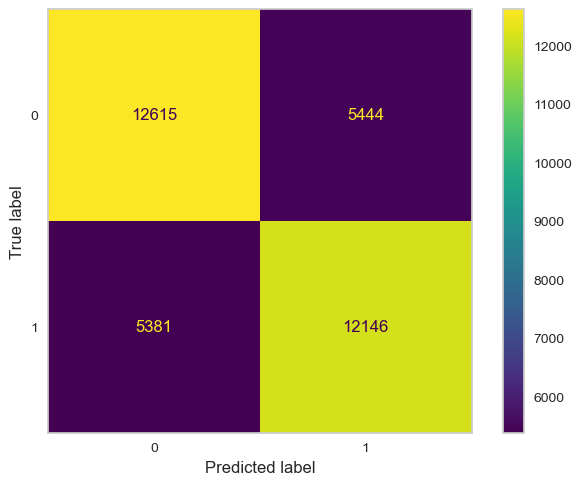

In [786]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_train_pred = best_model.predict(X_train)

cm = confusion_matrix(y_train, y_train_pred, labels=best_model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
display.plot()
plt.grid(None)
plt.show()

In [787]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70     18059
           1       0.69      0.69      0.69     17527

    accuracy                           0.70     35586
   macro avg       0.70      0.70      0.70     35586
weighted avg       0.70      0.70      0.70     35586



### Deploying Model on Test Data

In [ ]:
best_model.fit(X_test, y_test)
y_pred = best_model.predict(X_test)

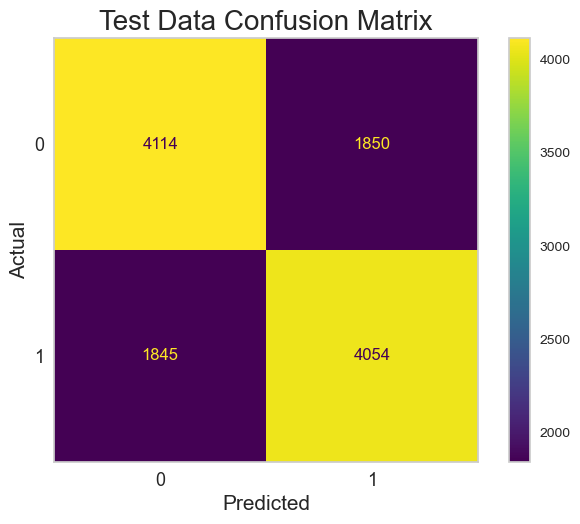

In [813]:
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
display.plot()
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15)
plt.title('Test Data Confusion Matrix', fontsize=20)

plt.grid(None)
plt.show()

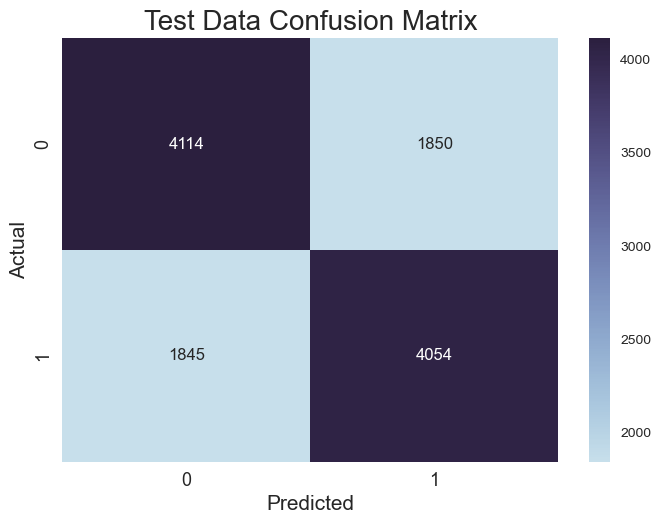

In [812]:
sns.heatmap(cm, annot=True, fmt="d", cmap=sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True))  # Using the "Blues" colormap
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15)
plt.title('Test Data Confusion Matrix', fontsize=20)

plt.grid(None)
plt.show()

In [795]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69      5964
           1       0.69      0.69      0.69      5899

    accuracy                           0.69     11863
   macro avg       0.69      0.69      0.69     11863
weighted avg       0.69      0.69      0.69     11863

